Importing the Dependencies

In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Data Collection and Processing

In [66]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('indian_liver_patient.csv')

In [67]:
# print first 5 rows of the dataset
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [68]:
# print last 5 rows of the dataset
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [69]:
# number of rows and columns in the dataset
data.shape

(583, 11)

In [70]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [71]:
# checking for missing values
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
target                        0
dtype: int64

In [72]:
data.dropna(inplace= True)

In [73]:
# statistical measures about the data
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [74]:
# checking the distribution of Target Variable
data['target'].value_counts()

target
1    414
2    165
Name: count, dtype: int64

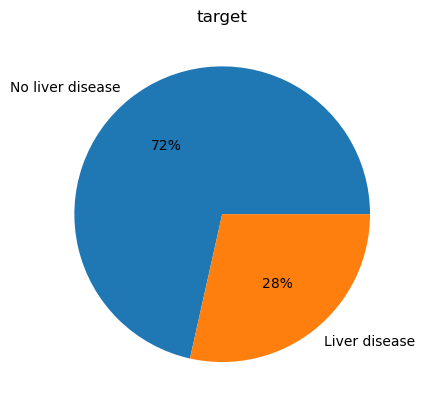

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
s= data.target.value_counts()
l = ["No liver disease", "Liver disease"]
plt.pie(x=s, labels=l, autopct="%1.0f%%")
plt.title("target")
plt.show()

In [76]:
data['Gender']=data['Gender'].apply(lambda x : 1 if x=='Male' else 0) 
data["target"] = data["target"].apply(lambda x: 1 if x==2 else 0)

In [77]:
data.groupby('target').mean()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
target,,,,,,,,,,
0,46.144928,0.780193,4.180435,1.931643,319.536232,99.973430,138.173913,6.458696,3.058454,0.914179
1,41.363636,0.703030,1.144848,0.396364,220.684848,33.836364,40.763636,6.539394,3.339394,1.029576


Splitting the Features and Target

In [78]:
X = data.drop(columns='target', axis=1)
Y = data['target']

In [79]:
data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
Age,1.000000,0.055881,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
Gender,0.055881,1.000000,0.088068,0.099160,-0.029368,0.081339,0.079421,-0.095149,-0.095579,-0.003424,-0.081349
Total_Bilirubin,0.011000,0.088068,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
Direct_Bilirubin,0.006784,0.099160,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
Alkaline_Phosphotase,0.078878,-0.029368,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
Alamine_Aminotransferase,-0.087799,0.081339,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
Aspartate_Aminotransferase,-0.020499,0.079421,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
Total_Protiens,-0.186248,-0.095149,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
Albumin,-0.264211,-0.095579,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
Albumin_and_Globulin_Ratio,-0.216408,-0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131


In [80]:
from imblearn.over_sampling import SMOTE

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
smote = SMOTE()


x_smote, y_smote = smote.fit_resample(X, Y)


print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 414, 1: 165})
Resample dataset shape Counter({0: 414, 1: 414})


Splitting the Data into Training data & Test Data

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.20,  random_state=24)

In [82]:
print(X.shape, X_train.shape, X_test.shape,  y_train.shape, y_test.shape)

(579, 10) (662, 10) (166, 10) (662,) (166,)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [84]:

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=24), tree_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 6]})

In [85]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4]})

In [86]:
forest_params = {"n_estimators":[10,100],"criterion":["gini","entropy","log_loss"],
                 "max_features":["sqrt","auto","log"],
                }

grid_forest = GridSearchCV(RandomForestClassifier(random_state=24), forest_params)
grid_forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'auto', 'log'],
                         'n_estimators': [10, 100]})

In [87]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(random_state=24), log_reg_params)
grid_log_reg.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=24),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [88]:
rforest_clf = grid_forest.best_estimator_
tree_clf = grid_tree.best_estimator_
knears_neighbors = grid_knears.best_estimator_
lg = grid_log_reg.best_estimator_

In [89]:
from sklearn.metrics import classification_report
classes = ['class 0: Negative', 'class 1: Positive']
print('Decision Tree Classifier:')
y_pred_tre = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred_tre, target_names=classes))

print('Random Forest Classifier:')
y_pred_forest =rforest_clf.predict(X_test)
print(classification_report(y_test, y_pred_forest,target_names=classes))

print('KNears Neighbors:')
y_pred_knear = knears_neighbors.predict(X_test)
print(classification_report(y_test, y_pred_knear,target_names=classes))

print('Logistic Regression:')
y_pred_log_reg = lg.predict(X_test)
print(classification_report(y_test, y_pred_log_reg, target_names=classes))


Decision Tree Classifier:
                   precision    recall  f1-score   support

class 0: Negative       0.76      0.56      0.64        84
class 1: Positive       0.64      0.82      0.72        82

         accuracy                           0.69       166
        macro avg       0.70      0.69      0.68       166
     weighted avg       0.70      0.69      0.68       166

Random Forest Classifier:
                   precision    recall  f1-score   support

class 0: Negative       0.82      0.85      0.83        84
class 1: Positive       0.84      0.80      0.82        82

         accuracy                           0.83       166
        macro avg       0.83      0.83      0.83       166
     weighted avg       0.83      0.83      0.83       166

KNears Neighbors:
                   precision    recall  f1-score   support

class 0: Negative       0.72      0.82      0.77        84
class 1: Positive       0.79      0.67      0.72        82

         accuracy                    

Model Training

In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [91]:
from sklearn.tree import DecisionTreeClassifier
model1 =DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
model4.fit(X_train, y_train)


KNeighborsClassifier()

In [94]:
from sklearn.metrics import classification_report

print('Logistic regression Classifier:')
y_pred_forest =model.predict(X_test)
print(classification_report(y_test, y_pred_forest))


Logistic regression Classifier:
              precision    recall  f1-score   support

           0       0.77      0.60      0.67        84
           1       0.66      0.82      0.73        82

    accuracy                           0.70       166
   macro avg       0.72      0.71      0.70       166
weighted avg       0.72      0.70      0.70       166



In [95]:
from sklearn.metrics import classification_report

print('decision tree Classifier:')
y_pred_forest =model1.predict(X_test)
print(classification_report(y_test, y_pred_forest))


decision tree Classifier:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        84
           1       0.70      0.72      0.71        82

    accuracy                           0.71       166
   macro avg       0.71      0.71      0.71       166
weighted avg       0.71      0.71      0.71       166



In [96]:
from sklearn.metrics import classification_report

print('random forest Classifier:')
y_pred_forest =model3.predict(X_test)
print(classification_report(y_test, y_pred_forest))

random forest Classifier:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        84
           1       0.79      0.79      0.79        82

    accuracy                           0.80       166
   macro avg       0.80      0.80      0.80       166
weighted avg       0.80      0.80      0.80       166



In [97]:
from sklearn.metrics import classification_report

print('knn Classifier:')
y_pred_forest =model4.predict(X_test)
print(classification_report(y_test, y_pred_forest))

knn Classifier:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69        84
           1       0.68      0.76      0.72        82

    accuracy                           0.70       166
   macro avg       0.71      0.71      0.70       166
weighted avg       0.71      0.70      0.70       166



In [107]:
import pickle
filename = 'liver_model.sav'
pickle.dump(model3, open(filename, 'wb'))

In [99]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [100]:
model1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [101]:
model3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [102]:
model4.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

<Axes: >

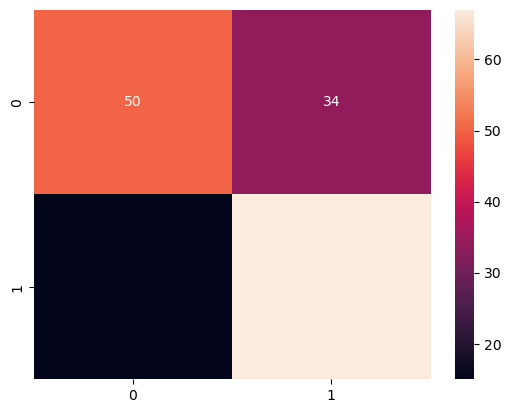

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, annot=True, fmt="d")

<Axes: >

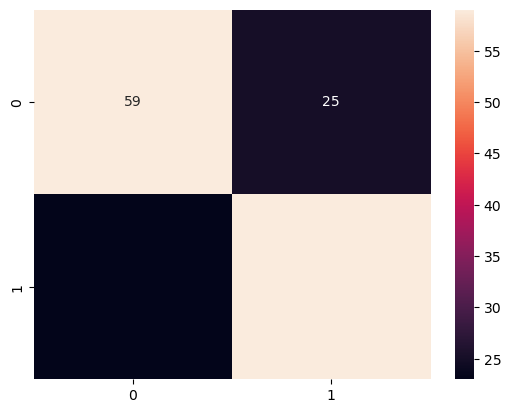

In [104]:
y_pred = model1.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, annot=True, fmt="d")

<Axes: >

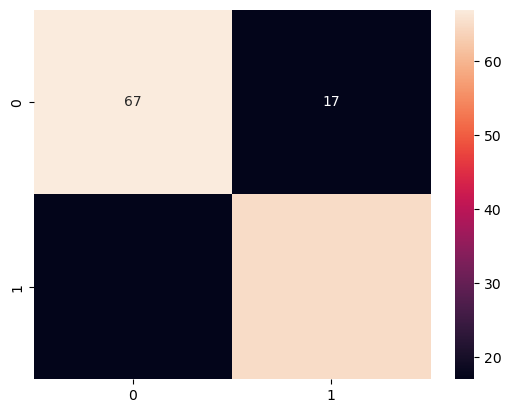

In [105]:
y_pred = model3.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, annot=True, fmt="d")

<Axes: >

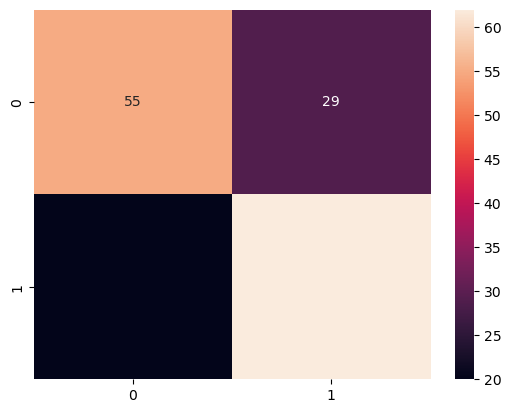

In [106]:
y_pred = model4.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, annot=True, fmt="d")